In [ ]:
import pandas as pd

Making the Collatz Function

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def collatz(n):
    sequence = [n]
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        sequence.append(n)
    #parts to add to data frame - optimzing process?
    sequence_length = len(sequence)
    halfway_point = sequence[sequence_length // 2]
    max_value = max(sequence)
    mean_value = sum(sequence) / sequence_length

    index_ratio = ((sequence.index(n))/len(sequence))
    mean_ratio = ((mean_value))/len(sequence)
    modulus_two = sequence.index(n)%2
    modulus_three = sequence.index(n)%3
    return sequence, sequence_length, halfway_point, max_value, mean_value, index_ratio, mean_ratio, modulus_two, modulus_three


Exploratory Analysis

In [ ]:
collatz_data = []
for num in range(1, 10001):
    sequence, seq_length, halfway, max_val, mean_val, index_ratio, mean_ratio, modulus_two, modulus_three = collatz(num)
    collatz_data.append((num, seq_length, halfway, max_val, mean_val,index_ratio, mean_ratio, modulus_two, modulus_three))

Creating Data Frame + Visualization

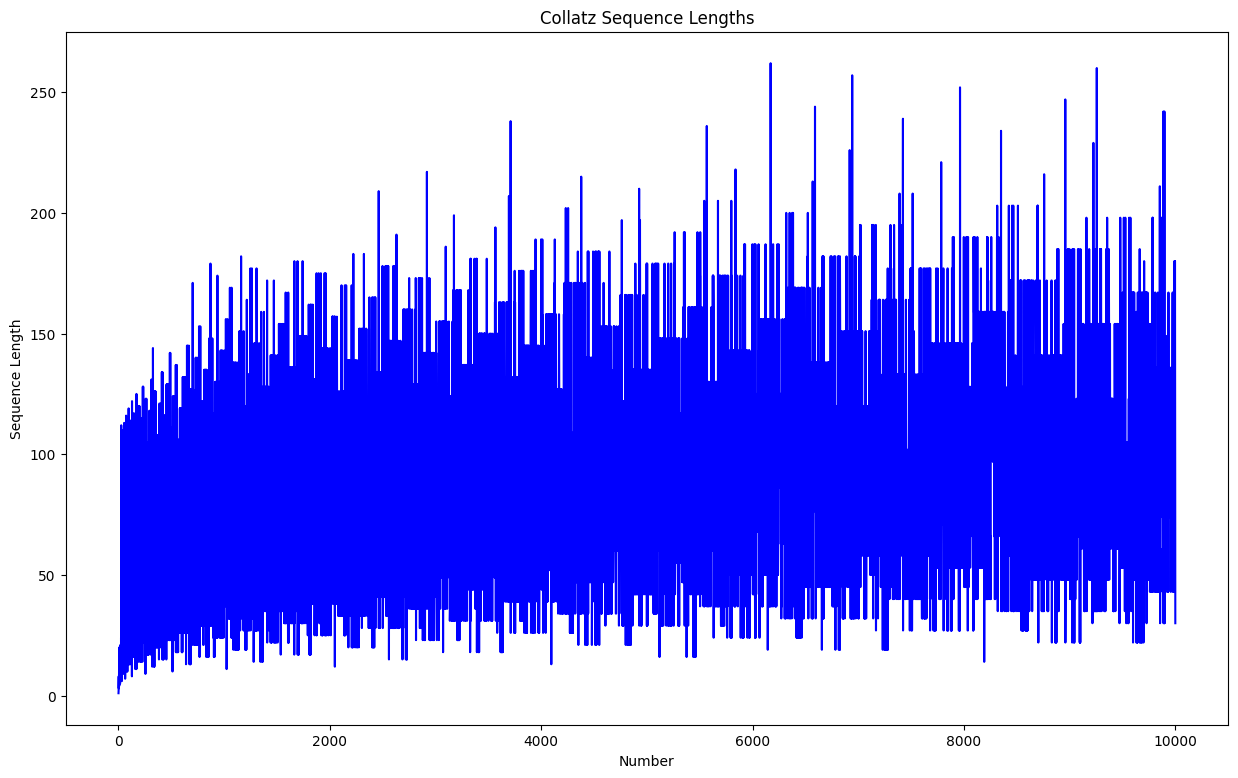

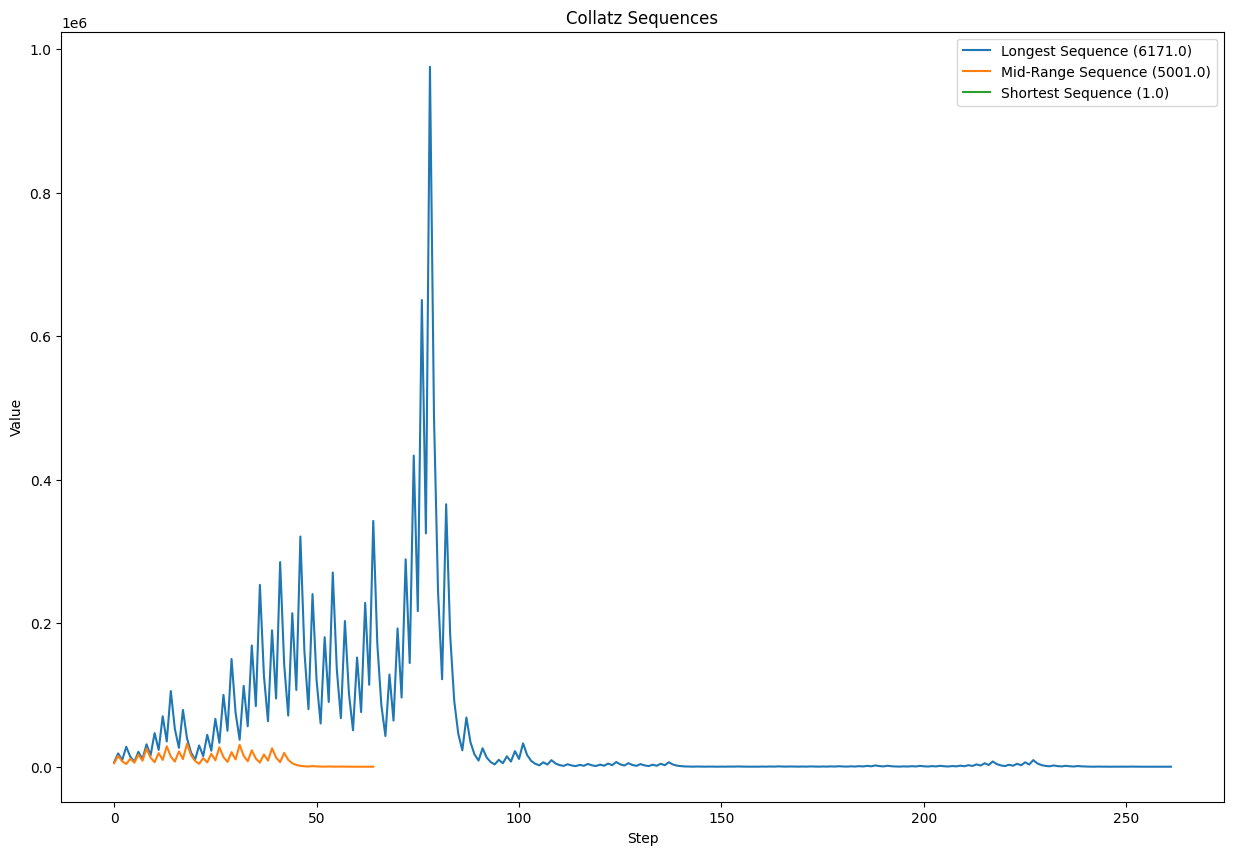

In [ ]:
# Creating Data Frame
df = pd.DataFrame(collatz_data, columns=['Number', 'Sequence Length', 'Final Halfway Point', 'Max Value in Sequence', 'Mean Value in Sequence','Index Ratio','Mean Ratio', "modulus two", "modulus three"])

#ChatGPT helped with this part of organizing the data
# Plot Sequence Length
plt.figure(figsize=(15, 9))
plt.plot(df['Number'], df['Sequence Length'], color='blue')
plt.xlabel('Number')
plt.ylabel('Sequence Length')
plt.title('Collatz Sequence Lengths')
plt.show()

# Visualize Specific Sequences
longest_seq = df.loc[df['Sequence Length'].idxmax()]['Number']
mid_range_seq = df.loc[df['Sequence Length'].idxmin() + 5000]['Number']
shortest_seq = df.loc[df['Sequence Length'].idxmin()]['Number']

longest_seq_data = collatz(longest_seq)[0]
mid_range_seq_data = collatz(mid_range_seq)[0]
shortest_seq_data = collatz(shortest_seq)[0]

plt.figure(figsize=(15, 10))
plt.plot(longest_seq_data, label=f'Longest Sequence ({longest_seq})')
plt.plot(mid_range_seq_data, label=f'Mid-Range Sequence ({mid_range_seq})')
plt.plot(shortest_seq_data, label=f'Shortest Sequence ({shortest_seq})')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Collatz Sequences')
plt.legend()
plt.show()

# Save DataFrame to CSV
df.to_csv('collatz_dataset.csv', index=False)


In [ ]:
df

,Number,Sequence Length,Final Halfway Point,Max Value in Sequence,Mean Value in Sequence,Index Ratio,Mean Ratio,modulus two,modulus three
0,1,1,1,1,1.000000,0.000000,1.000000,0,0
1,2,2,1,2,1.500000,0.500000,0.750000,1,1
2,3,8,8,16,6.125000,0.875000,0.765625,1,1
3,4,3,2,4,2.333333,0.666667,0.777778,0,2
4,5,6,4,16,6.000000,0.833333,1.000000,1,2
...,...,...,...,...,...,...,...,...,...
9995,9996,180,83501,250504,24941.105556,0.994444,138.561698,1,2
9996,9997,180,83501,250504,25149.394444,0.994444,139.718858,1,2
9997,9998,92,2429,33748,3098.858696,0.989130,33.683247,1,1
9998,9999,92,2429,101248,5765.293478,0.989130,62.666233,1,1


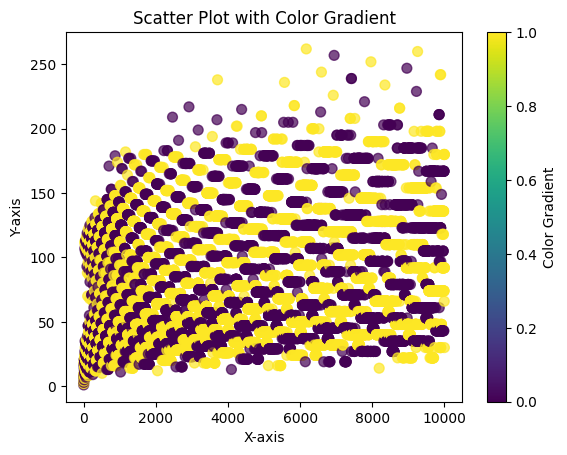

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Sample data
x = df['Number']
y = df['Sequence Length']
#chatGPT helped add a color gradient
color_gradient = df['modulus two']  # This is the numeric column for the color gradient

# Create a scatter plot with a color gradient
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=color_gradient, cmap='viridis', s=50, alpha=0.7)

# Add color bar
norm = Normalize(vmin=min(color_gradient), vmax=max(color_gradient))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # This line is necessary to map the color values correctly
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Color Gradient')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Color Gradient')

# Show the plot
plt.show()


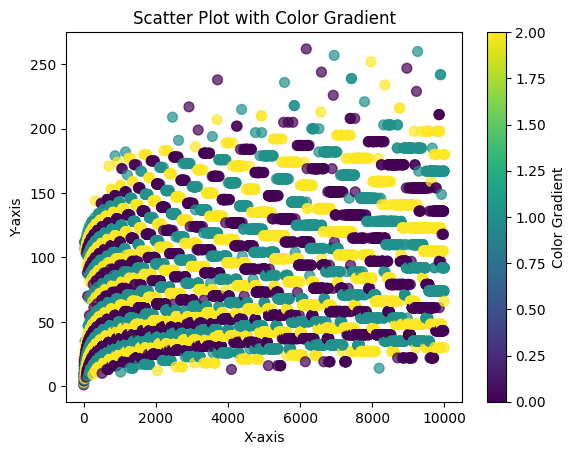

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Sample data
x = df['Number']
y = df['Sequence Length']
#chatGPT helped add a color gradient
color_gradient = df['modulus three']  # This is the numeric column for the color gradient

# Create a scatter plot with a color gradient
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=color_gradient, cmap='viridis', s=50, alpha=0.7)

# Add color bar
norm = Normalize(vmin=min(color_gradient), vmax=max(color_gradient))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # This line is necessary to map the color values correctly
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Color Gradient')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Color Gradient')

# Show the plot
plt.show()


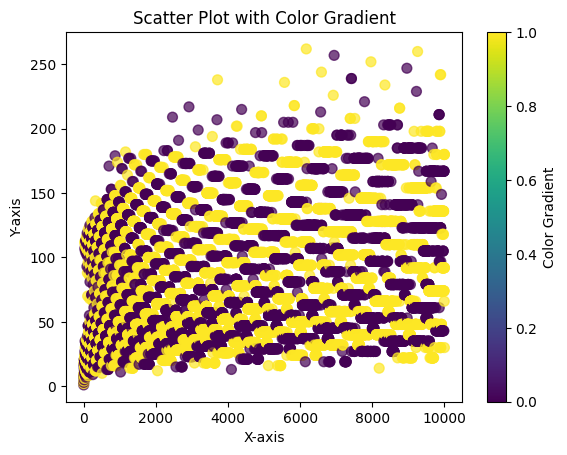

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Sample data
x = df['Number']
y = df['Sequence Length']
#chatGPT helped add a color gradient
color_gradient = df['modulus two']  # This is the numeric column for the color gradient

# Create a scatter plot with a color gradient
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=color_gradient, cmap='viridis', s=50, alpha=0.7)

# Add color bar
norm = Normalize(vmin=min(color_gradient), vmax=max(color_gradient))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # This line is necessary to map the color values correctly
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Color Gradient')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Color Gradient')

# Show the plot
plt.show()


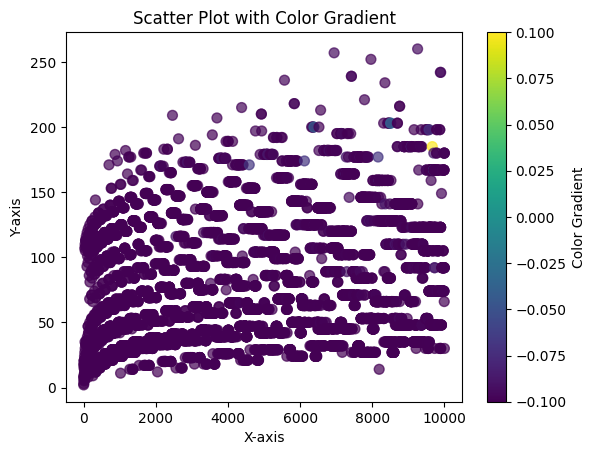

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Sample data
x = df['Number']
y = df['Sequence Length']
#chatGPT helped add a color gradient
color_gradient = ((df['Mean Value in Sequence'])/(df['modulus three']))  # This is the numeric column for the color gradient

# Create a scatter plot with a color gradient
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=color_gradient, cmap='viridis', s=50, alpha=0.7)

# Add color bar
norm = Normalize(vmin=min(color_gradient), vmax=max(color_gradient))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # This line is necessary to map the color values correctly
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Color Gradient')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Color Gradient')

# Show the plot
plt.show()


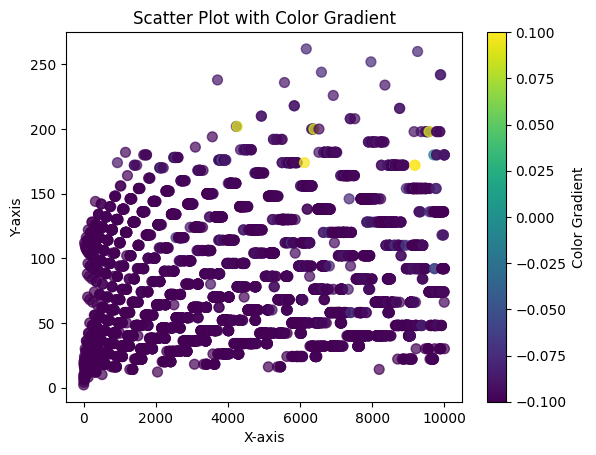

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Sample data
x = df['Number']
y = df['Sequence Length']
#chatGPT helped add a color gradient
color_gradient = ((df['Mean Value in Sequence'])/(df['modulus two']))  # This is the numeric column for the color gradient

# Create a scatter plot with a color gradient
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=color_gradient, cmap='viridis', s=50, alpha=0.7)

# Add color bar
norm = Normalize(vmin=min(color_gradient), vmax=max(color_gradient))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # This line is necessary to map the color values correctly
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Color Gradient')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Color Gradient')

# Show the plot
plt.show()


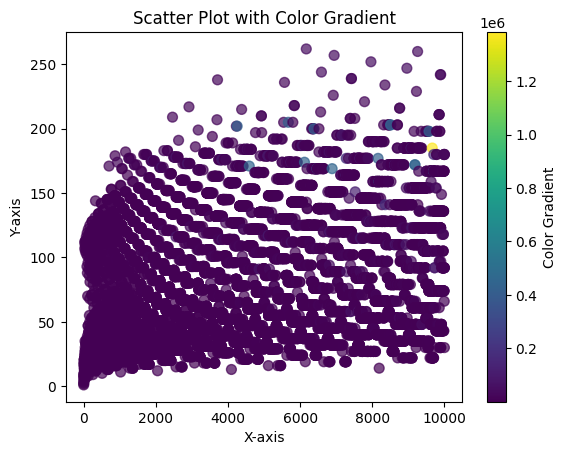

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Sample data
x = df['Number']
y = df['Sequence Length']
#chatGPT helped add a color gradient
color_gradient = ((df['Mean Value in Sequence']))  # This is the numeric column for the color gradient

# Create a scatter plot with a color gradient
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=color_gradient, cmap='viridis', s=50, alpha=0.7)

# Add color bar
norm = Normalize(vmin=min(color_gradient), vmax=max(color_gradient))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # This line is necessary to map the color values correctly
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Color Gradient')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Color Gradient')

# Show the plot
plt.show()


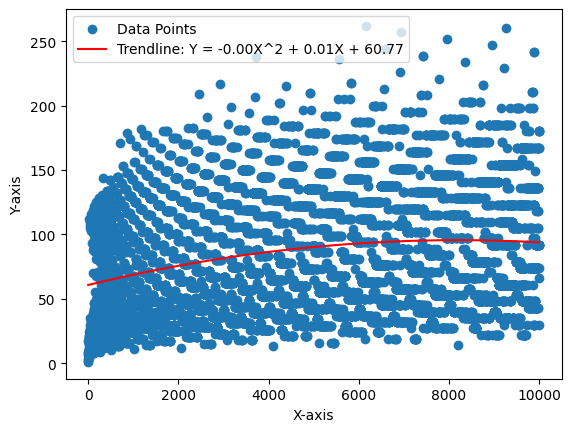

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data
x = df['Number']
y = df['Sequence Length']  # Example data that doesn't follow a linear pattern

# Define the function for the curve you want to fit (e.g., quadratic)
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the curve to the data using curve_fit
params, covariance = curve_fit(quadratic_func, x, y)

# Extract the fitted parameters
a, b, c = params

# Create the trendline using the fitted parameters
trendline = f"Y = {a:.2f}X^2 + {b:.2f}X + {c:.2f}"

# Generate y values for the trendline
predicted_y = quadratic_func(x, a, b, c)

# Create a scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the trendline
plt.plot(x, predicted_y, color='red', label=f'Trendline: {trendline}')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Sequence Length'], **{})
chart

Google Provided Code from Suggested Graphs

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Number', 'Sequence Length'], ['Sequence Length', 'Final Halfway Point'], ['Final Halfway Point', 'Max Value in Sequence'], ['Max Value in Sequence', 'Mean Value in Sequence']]], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Number', 'Sequence Length'], ['Sequence Length', 'Final Halfway Point'], ['Final Halfway Point', 'Max Value in Sequence'], ['Max Value in Sequence', 'Mean Value in Sequence']]], **{})
chart

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming your DataFrame is named 'df'
csv_filename = 'my_dataframe.csv'
csv_path = '/content/drive/MyDrive/2023-2024 School Year/Machine Learning' + csv_filename
df.to_csv(csv_path, index=False)

print(f"DataFrame exported to: {csv_path}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame exported to: /content/drive/MyDrive/2023-2024 School Year/Machine Learningmy_dataframe.csv
